In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/co2-data.csv')

In [8]:
g20_countries = ['Argentina', 'Australia', 'Brazil', 'Canada', 
'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'South Korea', 'Japan', 'Mexico', 'Russia', 
'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States','European Union (27)']

In [9]:
co2_countries = data.loc[data['year']>=1870]

In [10]:
g20_co2 = pd.DataFrame(data=None)
for country in g20_countries:
    helper_df = co2_countries.loc[co2_countries['country'] == country][['year','country','co2','co2_per_capita','gdp','population','share_global_co2','share_global_cement_co2','consumption_co2','consumption_co2_per_capita']]
    g20_co2 = pd.concat([g20_co2,helper_df])
g20_co2.reset_index(drop=True, inplace=True)

In [17]:
#plotting multiple G-20
def plot_g20countries(df,x,y,title,legend_size=16,text=None,g20_countries=g20_countries):
    plt.subplots(ncols=2,nrows=2,sharex=True,sharey=True,figsize=(20,10))

    countries=0
    previous = 0
    for plot in range(1,5):

        plt.subplot(2,2,plot)
        temp_df = pd.DataFrame(data=None)
        countries = plot*5 
        for counter in range(previous,countries):
            helper_df = df.loc[df['country'] == g20_countries[counter]]
            temp_df = pd.concat([temp_df,helper_df])
        sns.lineplot(data=temp_df, x=x,y=y,hue='country',palette='tab10')
        plt.legend(loc='upper left',fontsize=legend_size)
        previous+=5
    plt.suptitle(title,fontsize=18)
    plt.text(x=2000,y=57,s=text)
    return plt

In [18]:
import os
import matplotlib.pyplot as plt

parent_dir = ".."
part = "contributing_factors"
path_id = os.path.join(parent_dir,"plots",part)
os.makedirs(path_id)

In [19]:
def save_plot(plot_name,plot_extension="png",resolution=100,tight_layout=True):

    plot_path = os.path.join(path_id,plot_name+'.'+plot_extension)
    plt.savefig(plot_path,dpi=resolution,format=plot_extension)

    print(f"{plot_name} saved to plots.")

g20_per_capita_co2_emission saved to plots.


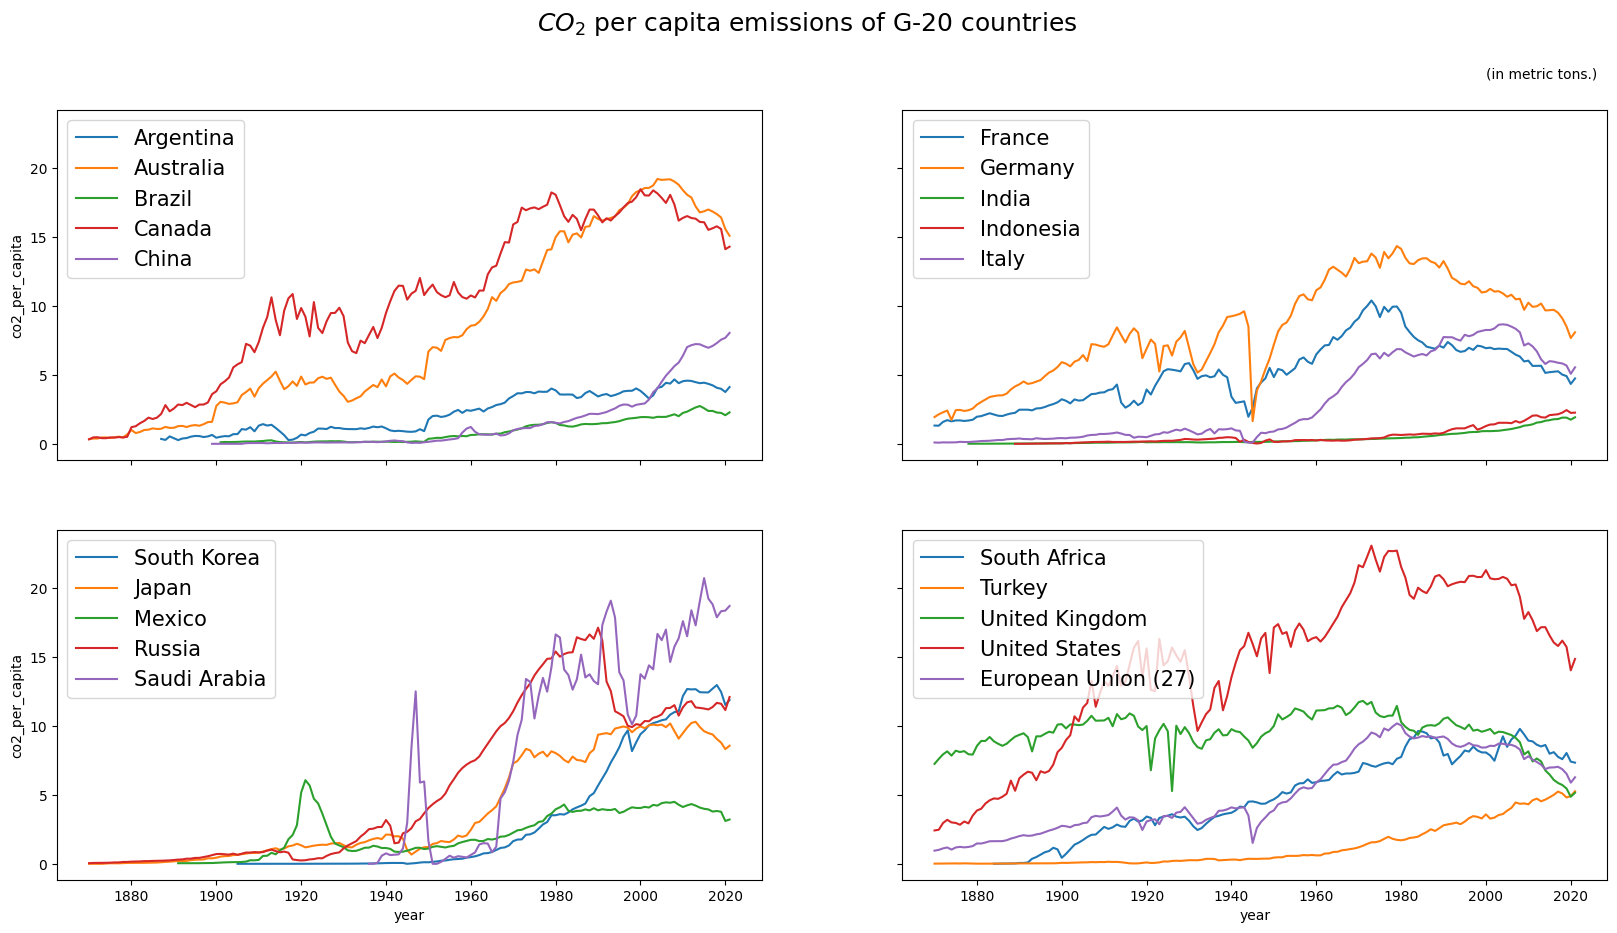

In [20]:
#plot co2_per_capita
plt = plot_g20countries(g20_co2,x='year',y='co2_per_capita',title='$CO_2$ per capita emissions of G-20 countries',legend_size=15,
text='(in metric tons.)')
save_plot("g20_per_capita_co2_emission")
plt.show()

g20_share_of_global_co2_emission saved to plots.


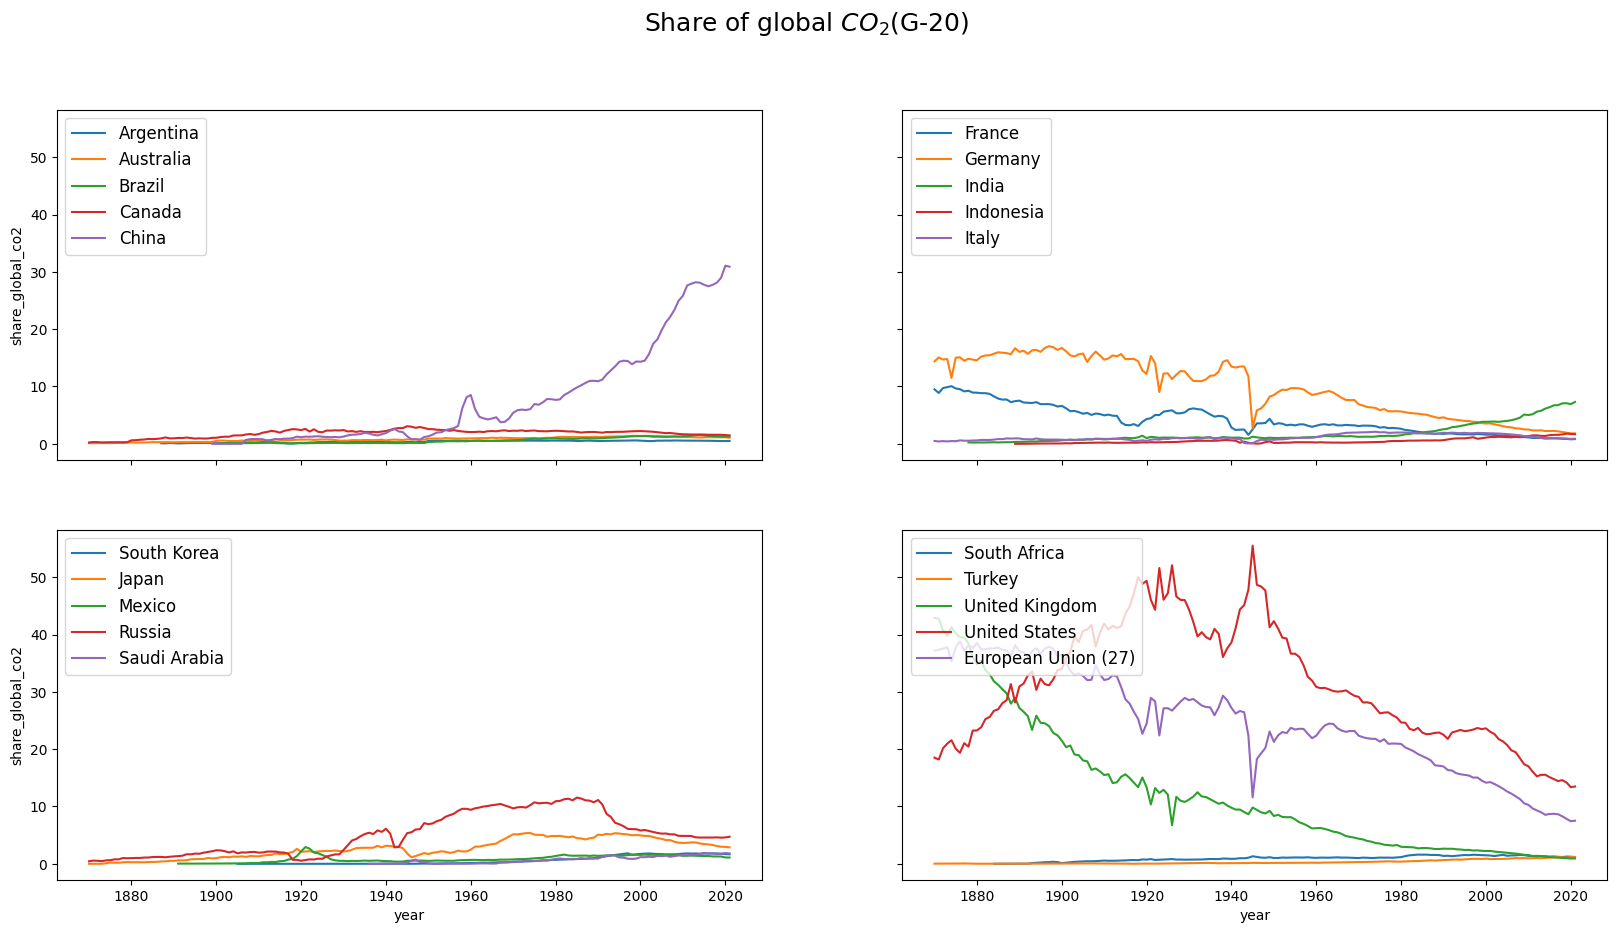

In [21]:
#plot share of co2

plt = plot_g20countries(g20_co2,x='year',y='share_global_co2',legend_size=12,title='Share of global $CO_2$(G-20)')
save_plot("g20_share_of_global_co2_emission")
plt.show()

g20_share_of_global_cement_co2_emission saved to plots.


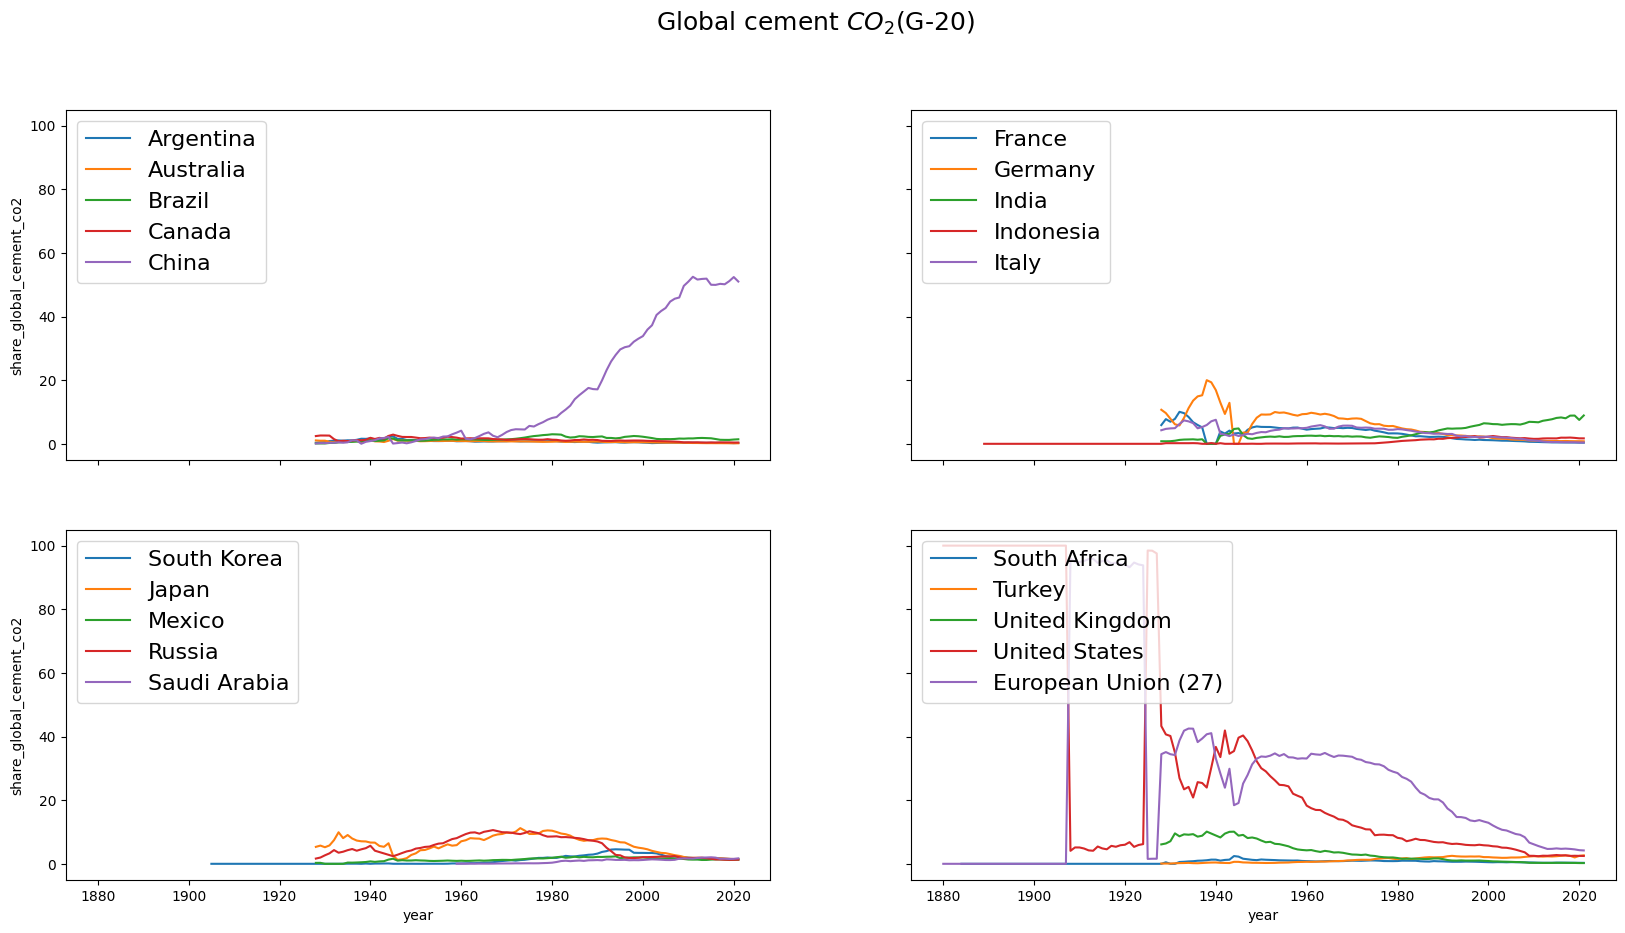

In [22]:
#plotting global cement co2
plt = plot_g20countries(df=g20_co2,x='year',y='share_global_cement_co2',title='Global cement $CO_2$(G-20)')
save_plot("g20_share_of_global_cement_co2_emission")
plt.show()

g20_share_of_global_consumption_co2_emission saved to plots.


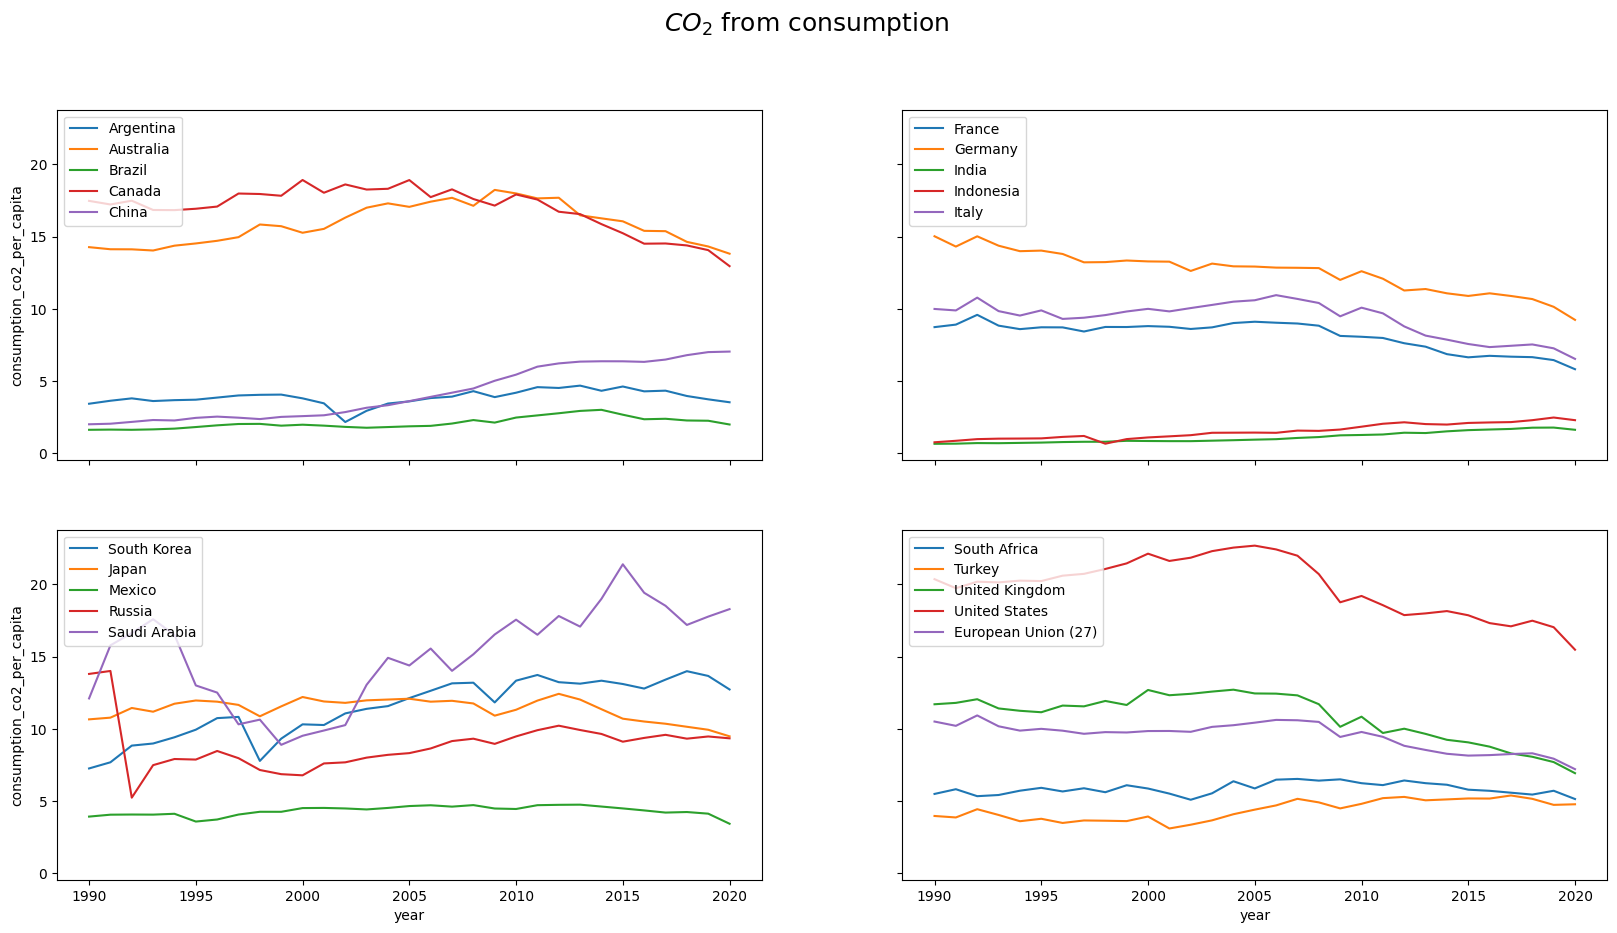

In [23]:
#consumption co2

plt = plot_g20countries(df=g20_co2, x='year', y='consumption_co2_per_capita',legend_size=10,title='$CO_2$ from consumption')
save_plot("g20_share_of_global_consumption_co2_emission")
plt.show()

In [65]:
#world methane, nitrous oxide, co2

world_gases = data.loc[data['country'] == 'World'][['year','methane','nitrous_oxide','co2']]
world_gases2 = world_gases.loc[world_gases['year'] > 2000].copy()
world2019 = world_gases.loc[world_gases['year']==2019]

In [71]:
world2019.values[0][1]

8609.92

In [25]:
total = world2019.values[0][1] + world2019.values[0][2] + world2019.values[0][3]
percentage = {'methane':world2019.values[0][1]/total, 'nitrous_oxide':world2019.values[0][2]/total,
'carbon dioxide':world2019.values[0][3]/total}

In [66]:
percentage

{'methane': 0.1764715925545021,
 'nitrous_oxide': 0.06347276898122822,
 'carbon dioxide': 0.7600556384642697}

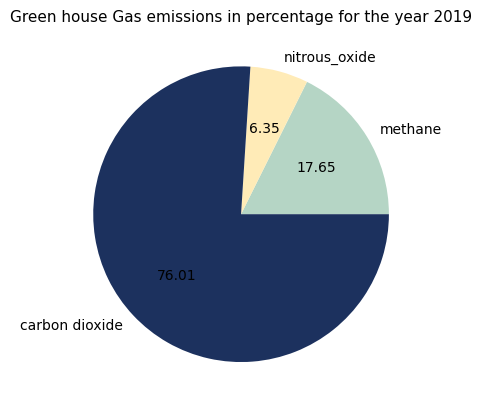

In [26]:
plt.pie(x=percentage.values(),labels=percentage.keys(),colors=['#B5D5C5','#FFEBB7','#1C315E'],autopct='%.2f')
plt.title("Green house Gas emissions in percentage for the year 2019",fontsize=11)
plt.show()

In [28]:
#temperature data to find the factors.
temp_data = pd.read_csv('../data/land_temp.csv')
temp_data.drop(0,inplace=True)

In [29]:
new_temp = temp_data.loc[temp_data['Year'] >=1960, ('Year','Monthly','Month')].copy()

In [30]:
new_temp['Year'] = new_temp['Year'].apply(lambda x: int(x))
new_temp['Monthly'] = new_temp['Monthly'].apply(lambda x: float(x))

In [31]:
new_temp = new_temp.loc[new_temp['Month']==10].copy()
new_temp.reset_index(drop=True, inplace=True)

In [32]:
#data required to find the factors
world_data = data.loc[data['country'] =='World'].copy()
world_data = world_data.loc[world_data['year']>=1960].copy()

In [33]:
world_data.reset_index(drop=True, inplace=True)

In [49]:
world_data.to_csv("../data/cleaned_world_co2.csv")

In [50]:
d = pd.read_csv("../data/cleaned_world_co2.csv")

In [34]:
def min_max(value,minimum, maximum):
    nom =  value - minimum
    den= maximum - minimum
    scaled = nom/den

    return scaled + 0.1

world_data['co2_scaled']=world_data['co2'].apply(min_max,minimum=min(world_data['co2']),maximum=max(world_data['co2']))
world_data['coal_scaled'] = world_data['coal_co2'].apply(min_max, minimum= min(world_data['coal_co2']), maximum=max(world_data['coal_co2']))
world_data['land_use_scaled'] = world_data['land_use_change_co2'].apply(min_max, minimum=min(world_data['land_use_change_co2']), maximum=max(world_data['land_use_change_co2']))

In [35]:
world_data['cement_scaled'] = world_data['cement_co2'].apply(min_max,minimum=min(world_data['cement_co2']), maximum=max(world_data['cement_co2']))
world_data['consumption_scaled'] = world_data['consumption_co2'].apply(min_max, minimum=world_data['consumption_co2'].min(), maximum= world_data['consumption_co2'].max())
world_data['gas_scaled'] = world_data['gas_co2'].apply(min_max, minimum=world_data['gas_co2'].min(), maximum=world_data['gas_co2'].max())
world_data['oil_scaled'] = world_data['oil_co2'].apply(min_max, minimum=world_data['oil_co2'].min(), maximum=world_data['oil_co2'].max())
world_data['other_scaled'] = world_data['other_industry_co2'].apply(min_max, minimum=world_data['other_industry_co2'].min(), maximum=world_data['other_industry_co2'].max())

In [36]:
new_temp['scaled_temp'] = new_temp['Monthly'].apply(min_max, minimum=min(new_temp['Monthly']),
maximum=max(new_temp['Monthly']))

temp_vs_first_factors saved to plots.


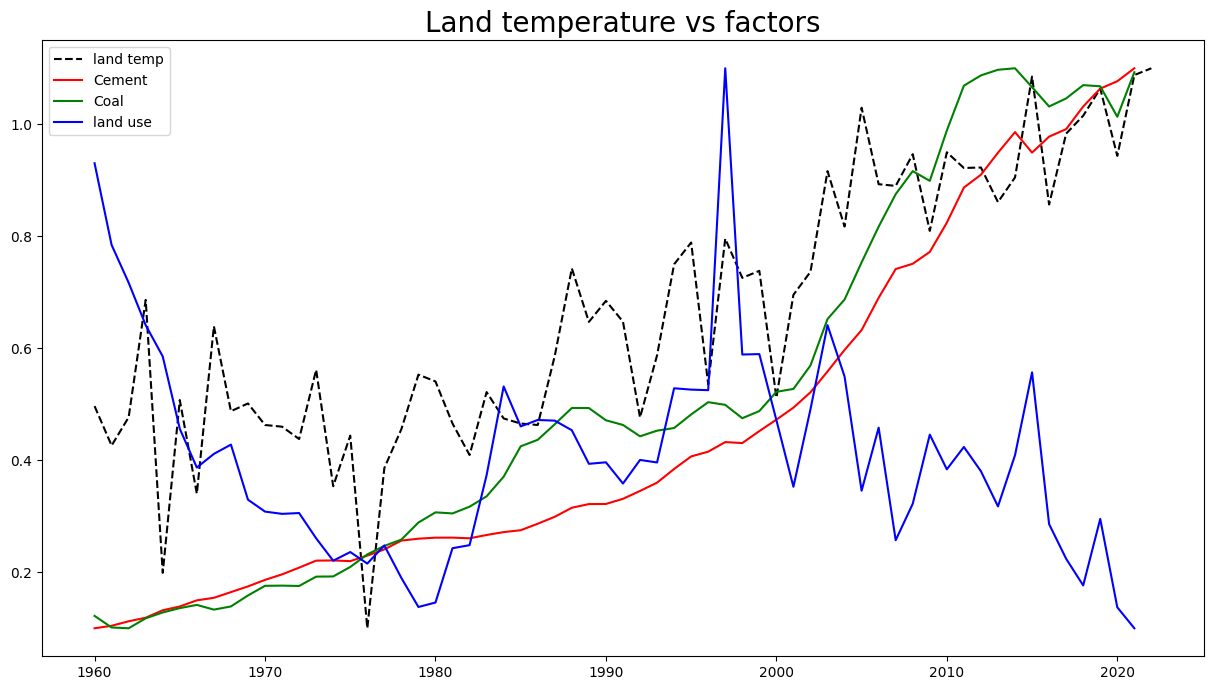

In [38]:
plt.figure(figsize=(15,8))

plt.plot(new_temp['Year'],new_temp['scaled_temp'],'k--',label='land temp')
plt.plot(world_data['year'],world_data['cement_scaled'],'r-',label='Cement')
plt.plot(world_data['year'],world_data['coal_scaled'],'g-',label='Coal')
plt.plot(world_data['year'],world_data['land_use_scaled'],'blue',label='land use')

plt.legend(loc='upper left')
plt.title('Land temperature vs factors',fontsize=20)
save_plot("temp_vs_first_factors")
plt.show()

temp_data_vs_second_factors saved to plots.


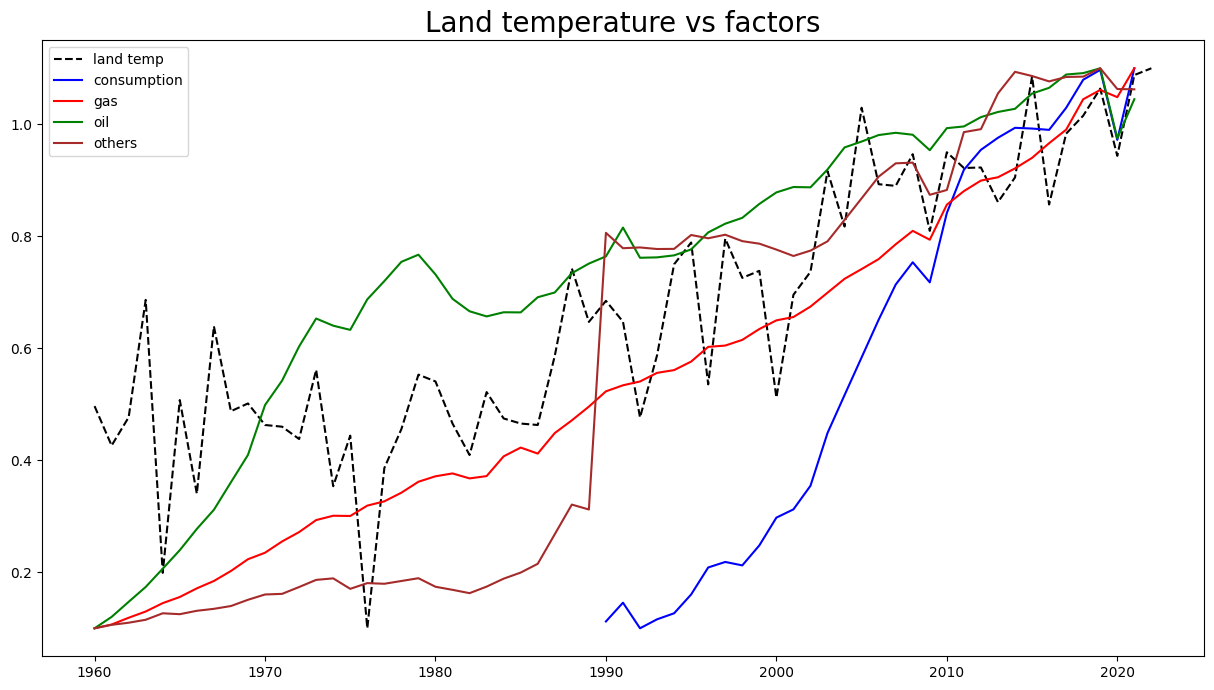

In [39]:
plt.figure(figsize=(15,8))

plt.plot(new_temp['Year'],new_temp['scaled_temp'],'k--',label='land temp')
plt.plot(world_data['year'],world_data['consumption_scaled'],'blue',label='consumption')
plt.plot(world_data['year'], world_data['gas_scaled'],'red',label='gas')
plt.plot(world_data['year'], world_data['oil_scaled'],'green',label='oil')
plt.plot(world_data['year'], world_data['other_scaled'],'brown',label='others')

plt.legend(loc='upper left')
plt.title('Land temperature vs factors',fontsize=20)
save_plot("temp_data_vs_second_factors")
plt.show()

In [40]:
#df for correlation

scaled_df = world_data.loc[:,('coal_scaled','oil_scaled','consumption_scaled','gas_scaled','other_scaled',
'cement_scaled','land_use_scaled')].copy()
scaled_df = pd.concat([scaled_df, new_temp['scaled_temp']],axis=1)

In [41]:
scaled_df.drop(62,inplace=True,axis=0)

In [42]:
correlation = scaled_df.corr()
correlation.to_csv("correlation_data.csv")

In [62]:
#pie chart for greenhouse gas emissions by factors

columns = ('coal_co2','land_use_change_co2', 'cement_co2','consumption_co2','gas_co2','oil_co2','other_industry_co2')
keys = ('Coal','Land use change','Cement','Consumption','Gas','Oil','Others')
factors2019 = world_data.loc[world_data['year']==2019,columns].copy()

In [53]:
total = factors2019.values.sum()

In [55]:
factors = {}
for value,key in zip(factors2019.values[0],keys):
    value = (value/total)*100
    factors.update({value:key})


In [56]:
factors

{19.261354548548862: 'Coal',
 5.064977248810957: 'Land use change',
 2.1506843859939657: 'Cement',
 47.73530475115919: 'Consumption',
 10.186199676608867: 'Gas',
 15.220683248412012: 'Oil',
 0.3807961404661561: 'Others'}

In [59]:
values_sorted=sorted(factors.keys(),reverse=True)

ranked_factors = {}
for value in values_sorted:
    key = factors.get(value)
    print(key)
    ranked_factors.update({key:value})

Consumption
Coal
Oil
Gas
Land use change
Cement
Others


In [58]:
ranked_factors

{'Consumption': 47.73530475115919,
 'Coal': 19.261354548548862,
 'Oil': 15.220683248412012,
 'Gas': 10.186199676608867,
 'Land use change': 5.064977248810957,
 'Cement': 2.1506843859939657,
 'Others': 0.3807961404661561}

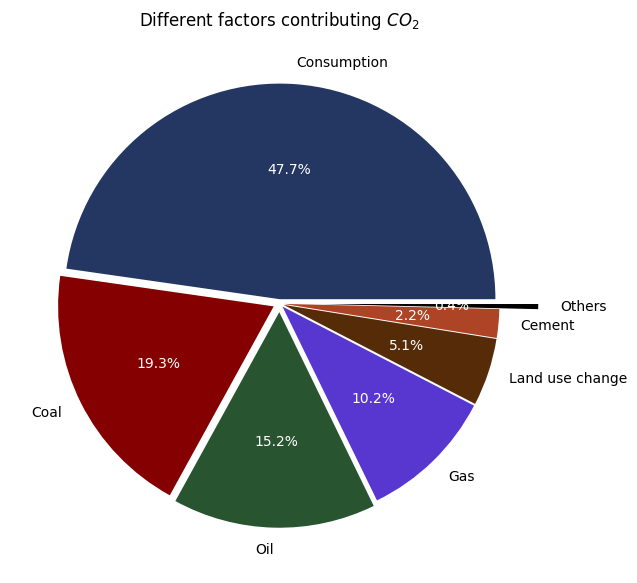

In [48]:
plt.figure(figsize=(20,7))
mexplode = [0.02,0.03,0.04,0.02,0.02,0.02,0.2]
a,b,autotexts = plt.pie(x=ranked_factors.values(),explode=mexplode,labels=ranked_factors.keys(),autopct='%.1f%%',
colors=['#243763','#850000','#285430','#5837D0','#562B08','#AC4425','#000000'])
for autotext in autotexts:
    autotext.set_color('white')
plt.title("Different factors contributing $CO_2$",loc='center')
plt.show()